Filtering and Visualization
============================
* Filtering based on criteria (fancy indexing)
* Line and scatter plots using Matplotlib
* Working with longer time records

CWK:  Plot the temperature and precipitation for New York, Philadelphia, Newark and Boston from 2005-2015. Create the following graphs:

* temperature line plot, with a labeled line for each city
* precipitation line plot, with a labeled line for each city
* temperature vs. precipitation scatter plot

Extra Credit: Pick 2 months from different seasons (for example December and  April) and redo 1-3 for just those months

Submit these graphs and a paragraph describing whether the patterns discussed in the first assignment still appear in the longer time record, (EC: and if those patterns still appear when the data is sampled by month), with references back to the graphs to support your assertions.

NOTE: Your graphs **MUST** be labeled. 





In [1]:
#lets start with yesterday's data, aggregated into city averages:

import pandas as pd
import numpy as np

data_path = "C:\\Users\\story645\\Desktop\\EAS213_2015\\571549.csv"
df = pd.read_csv(data_path)

nyc_inds = [sn.endswith("NY US") for sn in df['STATION_NAME']]
nyc = df[nyc_inds]
datakeys = [u'EMXP', u'MXSD', u'TPCP', u'TSNW', u'EMXT', u'EMNT', u'MMXT', u'MMNT', u'MNTM']
for dk in datakeys:
    nyc[dk][nyc[dk]==-9999]= np.nan

nyc_agg = nyc.groupby('DATE').mean()
print nyc_agg


          ELEVATION   LATITUDE  LONGITUDE        EMXP        MXSD  \
DATE                                                                
20150101  34.069231  40.789296 -73.825647  461.000000  240.300000   
20150201  34.069231  40.789296 -73.825647  263.538462  255.666667   
20150301  34.069231  40.789296 -73.825647  248.000000  246.000000   
20150401  34.069231  40.789296 -73.825647  289.769231    0.000000   
20150501  34.069231  40.789296 -73.825647  165.923077    0.000000   
20150601  33.571429  40.784668 -73.803001  366.500000    0.000000   

                 TPCP        TSNW        EMXT        EMNT        MMXT  \
DATE                                                                    
20150101  1258.230769  351.090909  144.500000 -137.833333   20.666667   
20150201   497.692308  217.090909   54.666667 -172.500000   -6.666667   
20150301  1159.000000  317.000000  152.000000 -118.666667   66.666667   
20150401   487.307692    0.000000  256.500000   -4.333333  158.000000   
20150501 

C:\Users\story645\Anaconda\lib\site-packages\pandas\core\series.py:632: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  self.where(~key, value, inplace=True)


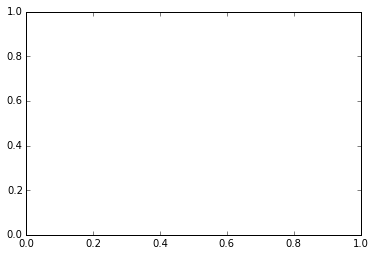

In [2]:
#lets look at the change in temperature over time

%matplotlib inline 
#embeds the graph in the notebook

import matplotlib.pyplot as plt

fig = plt.figure() # creates empty canvas 
ax = fig.add_subplot(1,1,1) # creates an x/y axis on the canvas 

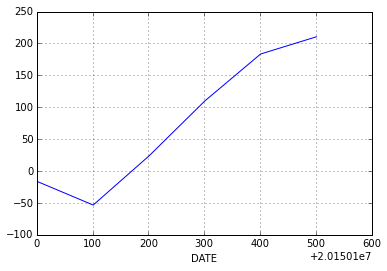

In [3]:
#lets grab the average temperature MNTM and put it on the fig
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
nyc_agg['MNTM'].plot(ax=ax)


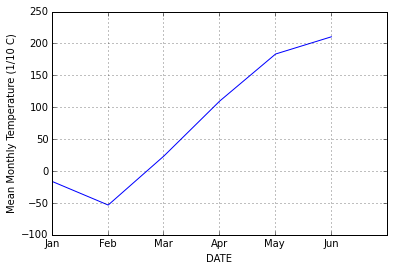

In [4]:
#but wait, labels?
fig = plt.figure() 
ax = fig.add_subplot(1,1,1)
nyc_agg['MNTM'].plot(ax=ax)
ax.set_ylabel("Mean Monthly Temperature (1/10 C)")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun'])

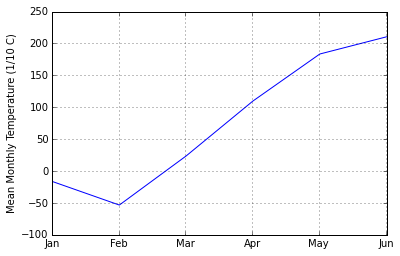

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
nyc_agg['MNTM'].plot(ax=ax)
ax.set_ylabel("Mean Monthly Temperature (1/10 C)")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun'])
#clean edge?
ax.set_xlim((20150100,20150601)) #must be in same units as index
ax.set_xlabel("")#removes DATE

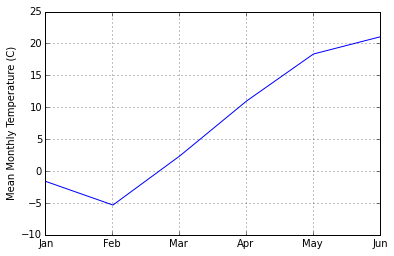

In [6]:
#readjust units into more common scale
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
(nyc_agg['MNTM']/10).plot(ax=ax)
ax.set_ylabel("Mean Monthly Temperature (C)")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun'])
#clean edge?
ax.set_xlim((20150100,20150601)) #must be in same units as index
ax.set_xlabel("")#removes DATE

Now try the time series for precipitation and at least two other variables. Then share some thoughts on how they compare. Is it easier to compare the data using tables or graphs?

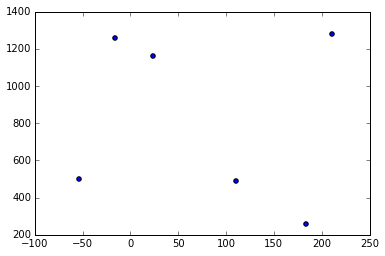

In [7]:
#Now how about comparing the precip to the temperature?

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nyc_agg['MNTM'],nyc_agg['TPCP'] )

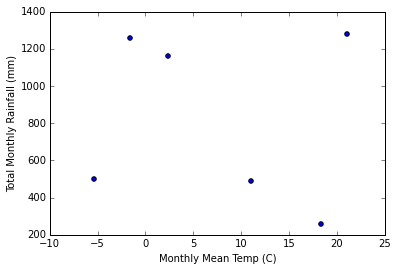

In [28]:
#what's missing? Is it clear what's happening above?
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(nyc_agg['MNTM']/10,nyc_agg['TPCP']) #rescale
ax.set_xlabel("Monthly Mean Temp (C)") #Label!
ax.set_ylabel("Total Monthly Rainfall (mm)") 

Convert the units to Fahrenheit and inches-does the graph change? Does it make a difference in the interpretation? (Easier/harder/neither?)
Plot the scatters of: Max vs Min temp, Snow vs. Rain, ... any other combo from the dataset

In [8]:
#multiple cities? 

boston_inds = [sn.endswith("MA US") for sn in df['STATION_NAME']]
boston = df[boston_inds]
datakeys = [u'EMXP', u'MXSD', u'TPCP', u'TSNW', u'EMXT', u'EMNT', u'MMXT', u'MMNT', u'MNTM']
for dk in datakeys:
    boston[dk][boston[dk]==-9999]= np.nan

boston_agg = boston.groupby('DATE').mean()

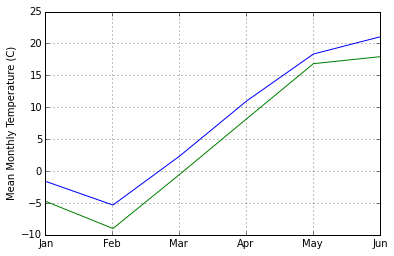

In [9]:
#plot?
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

(nyc_agg['MNTM']/10).plot(ax=ax)
(boston_agg['MNTM']/10).plot(ax=ax) #Just put it on the same plot!

ax.set_ylabel("Mean Monthly Temperature (C)")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun'])
#clean edge?
ax.set_xlim((20150100,20150601)) #must be in same units as index
ax.set_xlabel("")#removes DATE

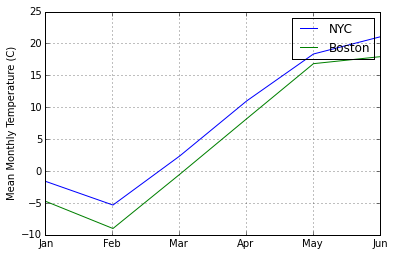

In [12]:
#tell them apart?

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

(nyc_agg['MNTM']/10).plot(ax=ax, label="NYC")#add in the label keyword
(boston_agg['MNTM']/10).plot(ax=ax, label="Boston")

ax.set_ylabel("Mean Monthly Temperature (C)")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun'])
#clean edge?
ax.set_xlim((20150100,20150601)) #must be in same units as index
ax.set_xlabel("")#removes DATE

ax.legend()#and add on a legend

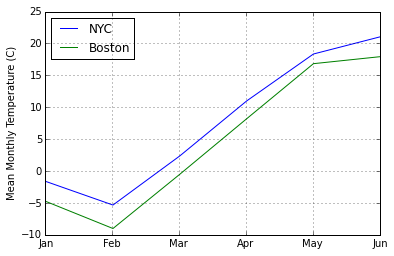

In [13]:
#move legend to better place
#http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.legend

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

(nyc_agg['MNTM']/10).plot(ax=ax, label="NYC")#add in the label keyword
(boston_agg['MNTM']/10).plot(ax=ax, label="Boston")

ax.set_ylabel("Mean Monthly Temperature (C)")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun'])
#clean edge?
ax.set_xlim((20150100,20150601)) #must be in same units as index
ax.set_xlabel("")#removes DATE

ax.legend(loc=0)

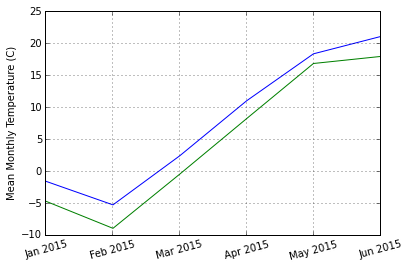

In [68]:
#more automatic x-axis? So it'd work for longer time records?
h
#http://matplotlib.org/examples/api/date_index_formatter.html

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

(nyc_agg['MNTM']/10).plot(ax=ax, label="NYC")#add in the label keyword
(boston_agg['MNTM']/10).plot(ax=ax, label="Boston")

#yaxis
ax.set_ylabel("Mean Monthly Temperature (C)")

#xaxis
def format_date(x, pos=None):
    #convert to string:
    xstr = str(int(x))
    #handle weird 00 bug
    if xstr.endswith('00'):
        xstr = str(int(x+1))
    #convert to datetime object so datetime string formatting can be used
    #https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior
    d = datetime.strptime(xstr,"%Y%m%d")
    return d.strftime("%b %Y")

#lets rotate the dates
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=15)
#and then format them
xfmt = mticker.FuncFormatter(format_date)
ax.xaxis.set_major_formatter(xfmt)
#and then trim then
ax.set_xlim((20150100,20150601))
ax.set_xlabel("")

In [1]:
#lets start with yesterday's data, aggregated into city averages:

import pandas as pd
import numpy as np

data_path = "C:\\Users\\story645\\Desktop\\EAS213_2015\\GHCN_2005_2015.csv"
df = pd.read_csv(data_path)

nyc_inds = [sn.endswith("NY US") for sn in df['STATION_NAME']]
nyc = df[nyc_inds]
datakeys = [u'EMXP', u'MXSD', u'TPCP', u'TSNW', u'EMXT', u'EMNT', u'MMXT', u'MMNT', u'MNTM']
for dk in datakeys:
    nyc[dk][nyc[dk]==-9999]= np.nan

nyc_agg = nyc.groupby('DATE').mean()
print nyc_agg

                 EMXP        MXSD         TPCP        TSNW        EMXT  \
DATE                                                                     
20050601   216.166667    0.000000   703.416667    0.000000  340.250000   
20050701   452.363636    0.000000  1121.000000    0.000000  349.454545   
20050801   281.750000    0.000000   392.000000    0.000000  358.250000   
20050901   235.166667    0.000000   381.083333    0.000000  328.083333   
20051001  1070.916667    0.000000  3897.583333    0.000000  262.000000   
20051101   263.416667    0.000000  1051.583333    2.000000  220.916667   
20051201   344.666667   95.888889  1090.666667  189.888889  126.833333   
20060101   332.500000   43.100000  1255.083333   49.900000  168.583333   
20060201   237.916667  375.333333   548.250000  435.222222  163.583333   
20060301   139.916667   32.900000   255.583333   33.900000  250.083333   
20060401   634.166667    0.000000  1375.166667    4.600000  275.000000   
20060501   423.416667    0.000000  115

C:\Users\story645\Anaconda\lib\site-packages\pandas\core\series.py:632: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame
  self.where(~key, value, inplace=True)


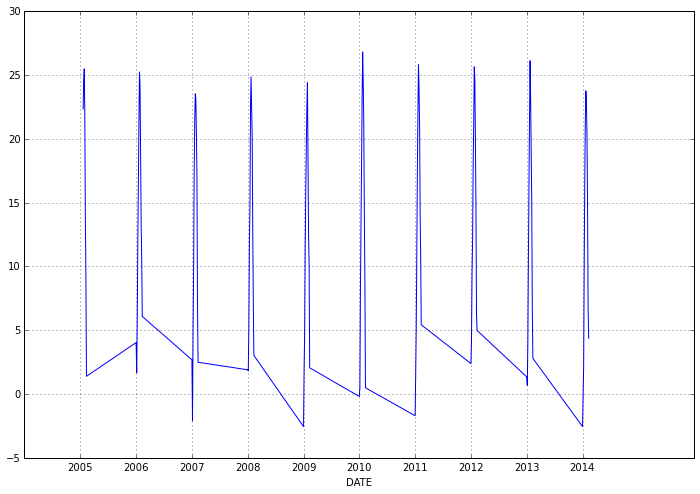

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
(nyc_agg['MNTM']/10).plot(ax=ax)
ax.set_xticks(range(20050101, 20150101,10000))
ax.set_xticklabels(['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'])

In [12]:
import matplotlib.ticker as mticker
from datetime import datetime

fig=plt.figure()
ax = fig.add_subplot(1,1,1)
(nyc_agg['MNTM']/10).plot(ax=ax)

#xaxis
def format_date(x, pos=None):
    #convert to string:
    xstr = str(int(x))
    if xstr.endswith('0001'):
        xstr = str(int(x+1000))
    #handle weird 00 bug
    if xstr.endswith('00'):
        xstr = str(int(x+1))
    #convert to datetime object so datetime string formatting can be used
    #https://docs.python.org/2/library/datetime.html#strftime-strptime-behavior
    d = datetime.strptime(xstr,"%Y%m%d")
    return d.strftime("%b %Y")

#lets rotate the dates
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=15)
#and then format them
xfmt = mticker.FuncFormatter(format_date)
ax.xaxis.set_major_formatter(xfmt)

ValueError: time data '20040001' does not match format '%Y%m%d'

In [10]:
'20040001'[4:6]
20040001+1000

20041001